<a href="https://colab.research.google.com/github/killiamc/Codificaciones_en_SistemasdeTelecomunicaciones/blob/main/Olimpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Archivo 1 -> notebook
Archivo 2 -> power point storytelling

#Importar librerias

In [68]:
!pip install googletrans==4.0.0-rc1

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator

#Analisis de los juegos olimpicos

In [70]:
OL= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/dataset_olympics.csv")

Traduccion base de datos

In [71]:
translator = Translator()
translated_columns = []

for column in OL.columns:
    language = translator.detect(column).lang
    translated_column = translator.translate(column, src=language, dest='es').text
    translated_columns.append(translated_column)

OL.columns = translated_columns

Conocer informacion de la base de datos

In [72]:
OL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDENTIFICACIÓN  70000 non-null  int64  
 1   Nombre          70000 non-null  object 
 2   Sexo            70000 non-null  object 
 3   Edad            67268 non-null  float64
 4   Altura          53746 non-null  float64
 5   Peso            52899 non-null  float64
 6   Equipo          70000 non-null  object 
 7   NOC             70000 non-null  object 
 8   Juegos          70000 non-null  object 
 9   Año             70000 non-null  int64  
 10  Estación        70000 non-null  object 
 11  Ciudad          70000 non-null  object 
 12  Deporte         70000 non-null  object 
 13  Evento          70000 non-null  object 
 14  Medalla         9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [73]:
OL.rename(columns={'No': 'NOC'}, inplace=True)
OL.rename(columns={'IDENTIFICACIÓN': 'ID'}, inplace=True)

In [74]:
OL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        70000 non-null  int64  
 1   Nombre    70000 non-null  object 
 2   Sexo      70000 non-null  object 
 3   Edad      67268 non-null  float64
 4   Altura    53746 non-null  float64
 5   Peso      52899 non-null  float64
 6   Equipo    70000 non-null  object 
 7   NOC       70000 non-null  object 
 8   Juegos    70000 non-null  object 
 9   Año       70000 non-null  int64  
 10  Estación  70000 non-null  object 
 11  Ciudad    70000 non-null  object 
 12  Deporte   70000 non-null  object 
 13  Evento    70000 non-null  object 
 14  Medalla   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [75]:
traducciones_ciudades = {
    'Albertville': 'Albertville',
    'Amsterdam': 'Amsterdam',
    'Antwerpen': 'Antwerpen',
    'Athina': 'Athina',
    'Atlanta': 'Atlanta',
    'Barcelona': 'Barcelona',
    'Beijing': 'Beijing',
    'Berlin': 'Berlin',
    'Calgary': 'Calgary',
    'Chamonix': 'Chamonix',
    "Cortina d'Ampezzo": "Cortina d'Ampezzo",
    'Garmisch-Partenkirchen': 'Garmisch-Partenkirchen',
    'Grenoble': 'Grenoble',
    'Helsinki': 'Helsinki',
    'Innsbruck': 'Innsbruck',
    'Lake Placid': 'Lake Placid',
    'Lillehammer': 'Lillehammer',
    'London': 'London',
    'Los Angeles': 'Los Angeles',
    'Melbourne': 'Melbourne',
    'Mexico City': 'Mexico City',
    'Montreal': 'Montreal',
    'Moskva': 'Moskva',
    'Munich': 'Munich',
    'Nagano': 'Nagano',
    'Oslo': 'Oslo',
    'Paris': 'Paris',
    'Rio de Janeiro': 'Rio de Janeiro',
    'Roma': 'Roma',
    'Salt Lake City': 'Salt Lake City',
    'Sankt Moritz': 'Sankt Moritz',
    'Sapporo': 'Sapporo',
    'Sarajevo': 'Sarajevo',
    'Seoul': 'Seoul',
    'Sochi': 'Sochi',
    'Squaw Valley': 'Squaw Valley',
    'St. Louis': 'St. Louis',
    'Stockholm': 'Stockholm',
    'Sydney': 'Sydney',
    'Tokyo': 'Tokyo',
    'Torino': 'Torino',
    'Vancouver': 'Vancouver'
}
traducciones_estacion = {'Summer': 'Verano', 'Winter': 'Invierno'}
traducciones_deportes = {
    'Alpinism': 'Alpinismo',
    'Archery': 'Tiro con arco',
    'Art Competitions': 'Competiciones de arte',
    'Athletics': 'Atletismo',
    'Badminton': 'Bádminton',
    'Baseball': 'Béisbol',
    'Basketball': 'Baloncesto',
    'Basque Pelota': 'Pelota vasca',
    'Beach Volleyball': 'Voleibol de playa',
    'Boxing': 'Boxeo',
    'Canoeing': 'Canoa',
    'Cricket': 'Críquet',
    'Croquet': 'Croquet',
    'Cycling': 'Ciclismo',
    'Diving': 'Clavados',
    'Equestrianism': 'Equitación',
    'Fencing': 'Esgrima',
    'Figure Skating': 'Patinaje artístico',
    'Football': 'Fútbol',
    'Golf': 'Golf',
    'Gymnastics': 'Gimnasia',
    'Handball': 'Balonmano',
    'Hockey': 'Hockey',
    'Ice Hockey': 'Hockey sobre hielo',
    'Jeu De Paume': 'Jeu de paume',
    'Judo': 'Judo',
    'Lacrosse': 'Lacrosse',
    'Modern Pentathlon': 'Pentatlón moderno',
    'Motorboating': 'Motonáutica',
    'Polo': 'Polo',
    'Racquets': 'Raquetas',
    'Rhythmic Gymnastics': 'Gimnasia rítmica',
    'Roque': 'Roque',
    'Rowing': 'Remo',
    'Rugby': 'Rugby',
    'Rugby Sevens': 'Rugby 7',
    'Sailing': 'Vela',
    'Shooting': 'Tiro',
    'Softball': 'Softbol',
    'Swimming': 'Natación',
    'Synchronized Swimming': 'Natación sincronizada',
    'Table Tennis': 'Tenis de mesa',
    'Taekwondo': 'Taekwondo',
    'Tennis': 'Tenis',
    'Trampolining': 'Trampolín',
    'Triathlon': 'Triatlón',
    'Tug-Of-War': 'Tug-Of-War',
    'Volleyball': 'Voleibol',
    'Water Polo': 'Polo acuático',
    'Weightlifting': 'Levantamiento de pesas',
    'Wrestling': 'Lucha libre'
}
traducciones_medalla = {'Gold': 'Oro', 'Silver': 'Plata','Bronce':'Bronce'}

OL['Ciudad'].replace(traducciones_ciudades, inplace=True)
OL['Estación'].replace(traducciones_estacion, inplace=True)
OL['Deporte'].replace(traducciones_deportes, inplace=True)
OL['Medalla'].replace(traducciones_medalla, inplace=True)

#columnas_a_traducir = [  'Ciudad', 'Deporte', 'Evento', 'Medalla']
#for columna in columnas_a_traducir:
#  traducciones = []
#  for x in OL[columna]:
#      y = translator.translate(str(x), src='en', dest='es').text
#      traducciones.append(y)
#  OL[columna] = traducciones

OL.head(10)



ID                    Nombre Sexo  Edad  Altura  Peso          Equipo  NOC  \
0   1                 A Dijiang    M  24.0   180.0  80.0           China  CHN   
1   2                  A Lamusi    M  23.0   170.0  60.0           China  CHN   
2   3       Gunnar Nielsen Aaby    M  24.0     NaN   NaN         Denmark  DEN   
3   4      Edgar Lindenau Aabye    M  34.0     NaN   NaN  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink    F  21.0   185.0  82.0     Netherlands  NED   
5   5  Christine Jacoba Aaftink    F  21.0   185.0  82.0     Netherlands  NED   
6   5  Christine Jacoba Aaftink    F  25.0   185.0  82.0     Netherlands  NED   
7   5  Christine Jacoba Aaftink    F  25.0   185.0  82.0     Netherlands  NED   
8   5  Christine Jacoba Aaftink    F  27.0   185.0  82.0     Netherlands  NED   
9   5  Christine Jacoba Aaftink    F  27.0   185.0  82.0     Netherlands  NED   

        Juegos   Año  Estación       Ciudad        Deporte  \
0  1992 Summer  1992    Verano    Barcelona     Baloncesto   
1  2012 Summer  2012    Verano       London           Judo   
2  1920 Summer  1920    Verano    Antwerpen         Fútbol   
3  1900 Summer  1900    Verano        Paris     Tug-Of-War   
4  1988 Winter  1988  Invierno      Calgary  Speed Skating   
5  1988 Winter  1988  Invierno      Calgary  Speed Skating   
6  1992 Winter  1992  Invierno  Albertville  Speed Skating   
7  1992 Winter  1992  Invierno  Albertville  Speed Skating   
8  1994 Winter  1994  Invierno  Lillehammer  Speed Skating   
9  1994 Winter  1994  Invierno  Lillehammer  Speed Skating   

                               Evento Medalla  
0         Basketball Men's Basketball     NaN  
1        Judo Men's Extra-Lightweight     NaN  
2             Football Men's Football     NaN  
3         Tug-Of-War Men's Tug-Of-War     Oro  
4    Speed Skating Women's 500 metres     NaN  
5  Speed Skating Women's 1,000 metres     NaN  
6    Speed Skating Women's 500 metres     NaN  
7  Speed Skating Women's 1,000 metres     NaN  
8    Speed Skating Women's 500 metres     NaN  
9  Speed Skating Women's 1,000 metres     NaN

Se selecciona los de verano

In [76]:
OLV = OL[OL['Estación'] == 'Verano']
OLV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58467 entries, 0 to 69998
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        58467 non-null  int64  
 1   Nombre    58467 non-null  object 
 2   Sexo      58467 non-null  object 
 3   Edad      55801 non-null  float64
 4   Altura    44485 non-null  float64
 5   Peso      43819 non-null  float64
 6   Equipo    58467 non-null  object 
 7   NOC       58467 non-null  object 
 8   Juegos    58467 non-null  object 
 9   Año       58467 non-null  int64  
 10  Estación  58467 non-null  object 
 11  Ciudad    58467 non-null  object 
 12  Deporte   58467 non-null  object 
 13  Evento    58467 non-null  object 
 14  Medalla   8404 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 7.1+ MB


Para remplazar los valores se ubica el deporte se deja por hombres y mujeres y se hace un interpolate de la posible estatura y peso que deberia tener el jugador debido a que el deporte exige un peso y altura.

In [77]:
OLV = OLV.sort_values(by=['Deporte'])
OLV.loc[OLV['Sexo'] == 'M', ['Altura','Peso']] = OLV[OLV['Sexo'] == 'M'][['Altura','Peso']].interpolate()
OLV.loc[OLV['Sexo'] == 'F', ['Altura','Peso']] = OLV[OLV['Sexo'] == 'F'][['Altura','Peso']].interpolate()
OLV = OLV.sort_values(by=['Edad'])
OLV.tail()

ID             Nombre Sexo  Edad      Altura       Peso  \
30111  15544  Jorge Diego Brown    M   NaN  181.666667  68.333333   
62406  31962    Ahmed El-Faghei    M   NaN  199.500000  95.500000   
62651  32100  Mustafa El-Musbah    M   NaN  197.000000  78.500000   
62588  32057     Adnan El-Khuja    M   NaN  195.000000  85.000000   
12296   6676    Kamaluddin Badi    M   NaN  200.500000  94.000000   

            Equipo  NOC       Juegos   Año Estación     Ciudad   Deporte  \
30111  Covunco III  ARG  1956 Summer  1956   Verano  Melbourne      Vela   
62406        Libya  LBA  1980 Summer  1980   Verano     Moskva  Voleibol   
62651        Libya  LBA  1980 Summer  1980   Verano     Moskva  Voleibol   
62588        Libya  LBA  1980 Summer  1980   Verano     Moskva  Voleibol   
12296        Libya  LBA  1980 Summer  1980   Verano     Moskva  Voleibol   

                                  Evento Medalla  
30111  Sailing Mixed Two Person Keelboat     NaN  
62406        Volleyball Men's Volleyball     NaN  
62651        Volleyball Men's Volleyball     NaN  
62588        Volleyball Men's Volleyball     NaN  
12296        Volleyball Men's Volleyball     NaN

Se elimina juegos y Season debido a que, el año es la misma informacion de juegos y se delimito anteriormente la temporada a verano, ya todos los valores son verano en el analisis.

In [78]:
OLV.drop(['Juegos','Estación'],axis=1)
OLV = OLV.sort_values(by=['ID'])
OLV.head(10)

ID                              Nombre Sexo  Edad  Altura  Peso  \
0    1                           A Dijiang    M  24.0  180.00  80.0   
1    2                            A Lamusi    M  23.0  170.00  60.0   
2    3                 Gunnar Nielsen Aaby    M  24.0  175.00  71.5   
3    4                Edgar Lindenau Aabye    M  34.0  171.00  80.5   
27   8  Cornelia "Cor" Aalten (-Strannood)    F  18.0  168.00  57.0   
26   8  Cornelia "Cor" Aalten (-Strannood)    F  18.0  168.00  54.0   
29  10      Einar Ferdinand "Einari" Aalto    M  26.0  184.25  81.5   
31  12                   Jyri Tapani Aalto    M  31.0  172.00  70.0   
33  13                  Minna Maarit Aalto    F  34.0  159.00  55.5   
32  13                  Minna Maarit Aalto    F  30.0  159.00  55.5   

            Equipo  NOC       Juegos   Año Estación       Ciudad     Deporte  \
0            China  CHN  1992 Summer  1992   Verano    Barcelona  Baloncesto   
1            China  CHN  2012 Summer  2012   Verano       London        Judo   
2          Denmark  DEN  1920 Summer  1920   Verano    Antwerpen      Fútbol   
3   Denmark/Sweden  DEN  1900 Summer  1900   Verano        Paris  Tug-Of-War   
27     Netherlands  NED  1932 Summer  1932   Verano  Los Angeles   Atletismo   
26     Netherlands  NED  1932 Summer  1932   Verano  Los Angeles   Atletismo   
29         Finland  FIN  1952 Summer  1952   Verano     Helsinki    Natación   
31         Finland  FIN  2000 Summer  2000   Verano       Sydney   Bádminton   
33         Finland  FIN  2000 Summer  2000   Verano       Sydney        Vela   
32         Finland  FIN  1996 Summer  1996   Verano      Atlanta        Vela   

                                    Evento Medalla  
0              Basketball Men's Basketball     NaN  
1             Judo Men's Extra-Lightweight     NaN  
2                  Football Men's Football     NaN  
3              Tug-Of-War Men's Tug-Of-War     Oro  
27  Athletics Women's 4 x 100 metres Relay     NaN  
26            Athletics Women's 100 metres     NaN  
29     Swimming Men's 400 metres Freestyle     NaN  
31                 Badminton Men's Singles     NaN  
33              Sailing Women's Windsurfer     NaN  
32              Sailing Women's Windsurfer     NaN

In [79]:
OLV.describe()

ID          Edad        Altura          Peso           Año
count  58467.000000  55801.000000  58465.000000  58465.000000  58467.000000
mean   18001.961329     25.761097    175.925203     71.520606   1976.015154
std    10224.067845      6.768449     10.289277     13.944527     31.079097
min        1.000000     12.000000    127.000000     25.000000   1896.000000
25%     9241.500000     21.000000    169.166667     62.000000   1956.000000
50%    18053.000000     25.000000    176.000000     70.500000   1984.000000
75%    26794.000000     29.000000    183.000000     80.000000   2000.000000
max    35657.000000     88.000000    223.000000    214.000000   2016.000000

Cantidad de nombres de atletas duplicados

In [80]:
print(OLV['Nombre'].duplicated().sum())

27333


Mapa calor de variables que se correlacionan

<ipython-input-81-9b5e97c58ab8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(OLV.corr(),annot=True,cmap="Reds")


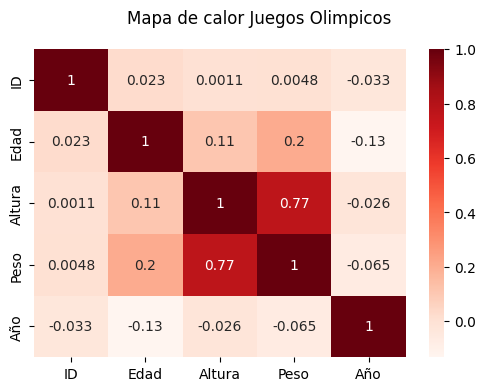

In [81]:
plt.figure(figsize=(6,4))
plt.suptitle("Mapa de calor Juegos Olimpicos")
sns.heatmap(OLV.corr(),annot=True,cmap="Reds")
plt.show()

# Agrupar por paises o NOC

Agrupamos por pais

In [82]:
Country = OLV.groupby("NOC")
Country.size()

NOC
AFG     38
AHO     28
ALB     11
ALG    244
AND     15
      ... 
YEM     22
YMD      1
YUG    447
ZAM     43
ZIM     88
Length: 226, dtype: int64

     NOC  Value
212  USA   4171
69   FRA   4094
100  ITA   3264
74   GBR   3107
12   AUS   2063
..   ...    ...
83   GUA    105
43   CMR    104
163  QAT     99
97   ISL     97
113  LAT     93

[85 rows x 2 columns]


<ipython-input-83-84ce0a82bc59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NOC',y='Value',data=co,palette="pastel")


<Axes: xlabel='NOC', ylabel='Value'>

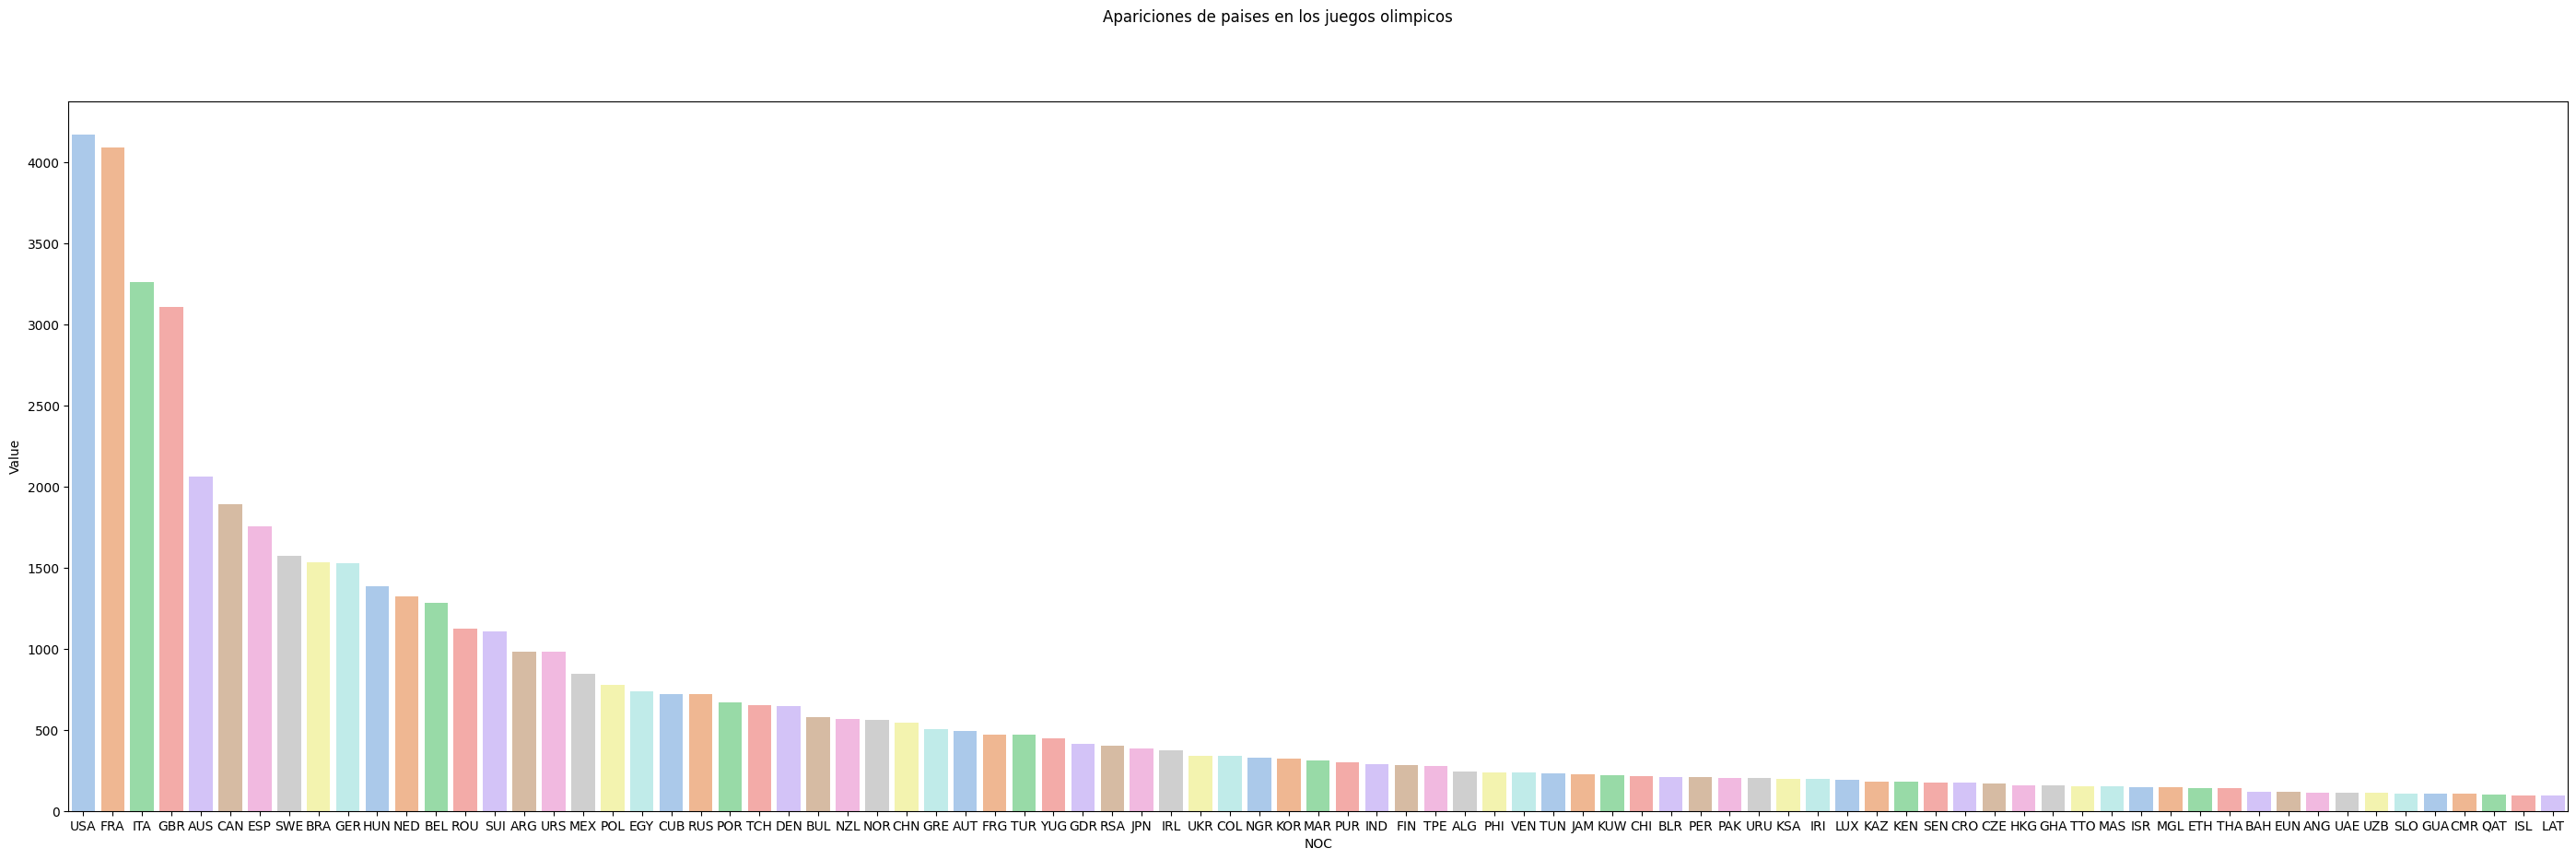

In [83]:
C = OLV.sort_values(by='NOC')
co = Country.size().reset_index(name='Value')
co = pd.DataFrame(co)
co = co.sort_values(by='Value',ascending=False).head(85)
print(co)
fig, axes = plt.subplots(1,figsize=(35,10))
fig.suptitle("Apariciones de paises en los juegos olimpicos")
sns.barplot(x='NOC',y='Value',data=co,palette="pastel")

Deportes jugados por pais en los olimpicos

In [84]:
cont = 0
dat_pais = []
fig, axes = plt.subplots(226, 1, figsize=(30, 500))
fig.suptitle("Juegos que participó cada país")

for key, group in OLV.groupby("NOC"):
    dat_pais.append(group)
    sns.countplot(ax=axes[cont], data=dat_pais[cont], hue='Deporte', x='Deporte', palette='Set1', legend=False)
    axes[cont].set_title(f'País: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_pais = []
fig, axes = plt.subplots(226, 1, figsize=(30, 500))
fig.suptitle("Distribucion de genero en los deportes por pais")
colores_sexo = {'M': 'red', 'F': 'blue'}

for key, group in OLV.groupby("NOC"):
    dat_pais.append(group)
    sns.countplot(ax=axes[cont], data=dat_pais[cont], hue='Sexo', x='Deporte', palette=colores_sexo)
    axes[cont].set_title(f'País: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Medallas por pais

In [ ]:
cont = 0
dat_pais = []
fig, axes = plt.subplots(226, 1, figsize=(30, 500))
fig.suptitle("Cantidad de medallas que tiene cada pais")
colores_medallas = {'Oro': 'red', 'Plata': 'blue', 'Bronze': 'green'}

for key, group in OLV.groupby("NOC"):
    group = group.dropna(subset=['Medalla'])
    dat_pais.append(group)
    sns.countplot(ax=axes[cont], data=dat_pais[cont], hue='Medalla', x='Medalla', palette=colores_medallas)
    axes[cont].set_title(f'País: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Mejores deportistas por pais

In [ ]:
cont = 0
dat_pais_at = []
fig, axes = plt.subplots(226, 1, figsize=(30, 500))
fig.suptitle("Atletas con la mayor cantidad de medallas")

for key, group in OLV.groupby("NOC"):
    group = group.dropna(subset=['Medalla'])
    athlete_counts = group.groupby('Nombre')['Medalla'].count().sort_values(ascending=False)
    athlete_counts = pd.DataFrame(athlete_counts.head(10))
    dat_pais_at.append(athlete_counts)
    sns.countplot(ax=axes[cont], data=dat_pais_at[cont], hue='Medalla', x='Nombre', palette="pastel")
    axes[cont].set_title(f'País: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_pais_at = []
fig, axes = plt.subplots(226, 1, figsize=(30, 500))
fig.suptitle("Juegos que participó cada país")

for key, group in OLV.groupby("NOC"):
    group = group.dropna(subset=['Medalla'])
    athlete_counts = group.groupby(['Deporte','Nombre'])['Medalla'].count().sort_values(ascending=False)
    athlete_counts = pd.DataFrame(athlete_counts.head(10))
    dat_pais_at.append(athlete_counts)
    sns.countplot(ax=axes[cont], data=dat_pais_at[cont], hue='Deporte', x='Nombre', palette='pastel')
    axes[cont].set_title(f'País: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
dat_pais_at = []
fig, axes = plt.subplots(226, 1, figsize=(55, 500))
fig.suptitle("Mejores 3 atletas por deporte y país")

# Iterar sobre cada país
for i, (key, group) in enumerate(OLV.groupby("NOC")):
    group = group.dropna(subset=['Medalla'])
    athlete_counts = group.groupby(['Deporte', 'Nombre'])['Medalla'].count().reset_index()
    top_10_athletes = athlete_counts.groupby('Deporte').apply(lambda x: x.nlargest(3, 'Medalla')).reset_index(drop=True)
    dat_pais_at.append(top_10_athletes)
    sns.barplot(ax=axes[i], data=top_10_athletes, x='Nombre', y='Medalla', hue='Deporte', palette='Set1')
    axes[i].set_title(f'País: {key}')

# Ajustar el diseño de la figura
fig.tight_layout()
plt.show()

Mejores años de cada pais -> mostrar en que año se ganaron mas medallas

In [ ]:
cont = 0
dat_pais_year = []
fig, axes = plt.subplots(226, 1, figsize=(30, 500))
fig.suptitle("Distribución de medallas de cada país por los años")

for key, group in OLV.groupby("NOC"):
    group = group.dropna(subset=['Medalla'])
    dat_pais_year.append(group)
    sns.kdeplot(ax=axes[cont], data=dat_pais_year[cont], x='Año', palette='colorblind')
    axes[cont].set_title(f'País: {key}')
    cont += 1

fig.tight_layout()
plt.show()

# Juegos olimpicos durante los años

In [ ]:
year = OLV.groupby('Año')
year.size()

In [ ]:
year.value_counts()
fig, axes = plt.subplots(2,1,figsize=(30,10))
fig.suptitle("Competidores inscritos por año juegos olimpicos")
sns.kdeplot(ax=axes[0],data=OLV, x="Año",multiple="stack",palette="green")
sns.countplot(ax=axes[1],x='Año',data=OLV,palette="pastel")

In [ ]:
cont = 0
dat_year = []
fig, axes = plt.subplots(29, 1, figsize=(30, 90))
fig.suptitle("Juegos que participó cada país")


for key, group in OLV.groupby("Año"):
    dat_year.append(group)
    sorted_group = group['NOC'].value_counts().head(40).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_year[cont], hue='NOC', x='NOC', palette='Set1',order = sorted_group)
    axes[cont].set_title(f'Año: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_year = []
fig, axes = plt.subplots(29, 1, figsize=(45, 90))
fig.suptitle("Generos de cada pais que participaron en los olimpicos durante los años")

for key, group in OLV.groupby("Año"):
    dat_year.append(group)
    sorted_group = group['NOC'].value_counts().head(30).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_year[cont], hue='Sexo', x='NOC', palette='Set1',order = sorted_group)
    axes[cont].set_title(f'Año: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Top 20 de paises con medallas por año

In [ ]:
cont = 0
dat_year = []
fig, axes = plt.subplots(29, 1, figsize=(30, 90))
fig.suptitle("País que gano mas medallas en cada distribucion de los olimpicos")

for key, group in OLV.groupby("Año"):
    group = group.dropna(subset=['Medalla'])
    dat_year.append(group)
    sorted_group = group['NOC'].value_counts().head(20).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_year[cont], hue='NOC', x='NOC', palette='Set1',order = sorted_group)
    axes[cont].set_title(f'Año: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_year = []
fig, axes = plt.subplots(29, 1, figsize=(55, 100))
fig.suptitle("Distribucion de medallas segun los mas ganadores")
colores_medallas = {'Oro': 'red', 'Plata': 'blue', 'Bronze': 'green'}

for key, group in OLV.groupby("Año"):
    group = group.dropna(subset=['Medalla'])
    dat_year.append(group)
    sorted_group = group['NOC'].value_counts().head(10).sort_values(ascending=False).index

    sns.countplot(ax=axes[cont], data=dat_year[cont], hue='Medalla', x='NOC', palette=colores_medallas, order=sorted_group)
    axes[cont].set_title(f'Año: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Aumento de competiores masculinos y femeninos

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle("Cantidad de competidores masculinos en los años")
mas =OLV[OLV['Sexo'] == 'M']
mas = pd.DataFrame(mas)
sns.kdeplot(ax=axes[0], data=mas , x='Año', palette='pastel')
axes[0].set_title('Año Masculino')
fem = OLV[OLV['Sexo'] == 'F']
fem = pd.DataFrame(fem)
sns.kdeplot(ax=axes[1], data=fem, x='Año', palette='pastel')
axes[1].set_title('Año Femeninos')


In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle("Cantidad de competidores masculinos en los años")
mas =OLV[OLV['Sexo'] == 'M']
mas = mas.dropna(subset=['Medalla'])
mas = pd.DataFrame(mas)
sns.kdeplot(ax=axes[0], data=mas , x='Año', palette='pastel')
axes[0].set_title('Año Masculino')

fem = OLV[OLV['Sexo'] == 'F']
fem = fem.dropna(subset=['Medalla'])
fem = pd.DataFrame(fem)
sns.kdeplot(ax=axes[1], data=fem, x='Año', palette='pastel')
axes[1].set_title('Año Femeninos')


# Sport

In [ ]:
sport = OLV.groupby('Deporte')
sport.size()

In [ ]:
sport.value_counts()
print(sport)
fig, axes = plt.subplots(1,figsize=(60,15))
fig.suptitle("Competidores inscritos por año juegos olimpicos")
sns.countplot(x='Deporte',data=OLV,palette="pastel")

Evolucion de cada deporte durante los años

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(15, 100))
fig.suptitle("Distribucion de jugadores en cada deporte durante los años")

for key, group in OLV.groupby("Deporte"):
    dat_sport.append(group)
    sns.kdeplot(ax=axes[cont], data=dat_sport[cont], x='Año')
    axes[cont].set_title(f'Deporte: {key}')
    cont += 1

fig.tight_layout()
fig.show()

Valores atipicos de cada deporte

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(51, 3, figsize=(15, 100))
fig.suptitle("Variables de los jugadores por deporte")

for key, group in OLV.groupby("Deporte"):
    if key != 'Alpinismo':
        dat_sport.append(group)
        sns.boxplot(ax=axes[cont,0], data=dat_sport[cont],x = 'Sexo', y='Altura', color='skyblue')
        sns.boxplot(ax=axes[cont,1], data=dat_sport[cont],x = 'Sexo', y='Peso', color='salmon')
        sns.boxplot(ax=axes[cont,2], data=dat_sport[cont],x = 'Sexo', y='Edad', color='green')
        axes[cont,0].set_title(f'Deporte: {key}')
        axes[cont,1].set_title(f'Deporte: {key}')
        axes[cont,2].set_title(f'Deporte: {key}')
        cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 3, figsize=(15, 100))
fig.suptitle("Varibales de los mejores jugadores en cada deporte")

for key, group in OLV.groupby("Deporte"):
    if key != 'Alpinismo':
        group = group.dropna(subset=['Medalla'])
        dat_sport.append(group)
        sns.boxplot(ax=axes[cont,0], data=dat_sport[cont],x = 'Sexo', y='Altura', color='skyblue')
        sns.boxplot(ax=axes[cont,1], data=dat_sport[cont],x= 'Sexo', y='Peso', color='salmon')
        sns.boxplot(ax=axes[cont,2], data=dat_sport[cont],x = 'Sexo', y='Edad', color='green')
        axes[cont,0].set_title(f'Deporte: {key}')
        axes[cont,1].set_title(f'Deporte: {key}')
        axes[cont,2].set_title(f'Deporte: {key}')
        cont += 1

fig.tight_layout()
fig.show()

Categorias de cada deporte numero de jugadores

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(50, 60))
fig.suptitle("Categorias de cada deporte")

for key, group in OLV.groupby("Deporte"):
    dat_sport.append(group)
    sorted_group = group['Evento'].value_counts().sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='Evento', x='Evento', palette='Set1',order=sorted_group)
    axes[cont].set_title(f'Deportes: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Aumento de participantes de juegos por pais

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(20, 100))
fig.suptitle("Mejores atletas de cada deporte")

for key, group in OLV.groupby("Deporte"):
    dat_sport.append(group)
    sorted_group = group['NOC'].value_counts().head(10).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='NOC', x='NOC', palette='Set1',order=sorted_group)
    axes[cont].set_title(f'Deportes: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(20, 100))
fig.suptitle("Los Paises que mas juegan un deporte para hombres")

for key, group in OLV.groupby("Deporte"):
    group = group[group['Sexo'] == 'M']  # Filtrar por hombres
    dat_sport.append(group)
    sorted_group = group['NOC'].value_counts().head(10).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='NOC', x='NOC', palette='Set1', order=sorted_group)
    axes[cont].set_title(f'Deporte: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(20, 100))
fig.suptitle("Los Paises que ms juegan un deporte para Mujeres")

for key, group in OLV.groupby("Deporte"):
    group = group[group['Sexo'] == 'F']
    dat_sport.append(group)
    sorted_group = group['NOC'].value_counts().head(10).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='NOC', x='NOC', palette='Set1', order=sorted_group)
    axes[cont].set_title(f'Deporte: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(55, 100))
fig.suptitle("Paises que tuvieron mas medallas")
colores_medallas = {'Oro': 'red', 'Plata': 'blue', 'Bronze': 'green'}

for key, group in OLV.groupby("Deporte"):
    group = group.dropna(subset=['Medalla'])
    dat_sport.append(group)
    sorted_group = group['NOC'].value_counts().head(15).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='Medalla', x='NOC', palette=colores_medallas, order=sorted_group)
    axes[cont].set_title(f'Deportes: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(55, 100))
fig.suptitle("Paises que tuvieron mas medallas hombres")

for key, group in OLV.groupby("Deporte"):
    group = group.dropna(subset=['Medalla'])
    group = group[group['Sexo'] == 'M']
    dat_sport.append(group)
    sorted_group = group['NOC'].value_counts().head(20).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='Medalla', x='NOC', order=sorted_group, palette=colores_medallas)
    axes[cont].set_title(f'Deportes: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(52, 1, figsize=(55, 100))
fig.suptitle("Paises que tuvieron mas medallas mujeres")

for key, group in OLV.groupby("Deporte"):
    group = group.dropna(subset=['Medalla'])
    group = group[group['Sexo'] == 'F']
    dat_sport.append(group)
    sorted_group = group['NOC'].value_counts().head(20).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_sport[cont], hue='Medalla', x='NOC', order=sorted_group, palette=colores_medallas)
    axes[cont].set_title(f'Deportes: {key}')
    cont += 1

fig.tight_layout()
plt.show()

# Evento

In [ ]:
Evento = OLV.groupby('Evento')
Evento.size()

In [ ]:
dept_espe = sport.get_group('Atletismo')
dept_espe = pd.DataFrame(dept_espe)
print(dept_espe)

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(50, 1, figsize=(15, 100))
fig.suptitle("Distribucion de jugadores en cada evento durante los años")

for key, group in dept_espe.groupby("Evento"):
    dat_sport.append(group)
    sns.kdeplot(ax=axes[cont], data=dat_sport[cont], x='Año')
    axes[cont].set_title(f'Evento: {key}')
    cont += 1

fig.tight_layout()
fig.show()

In [ ]:
cont = 0
dat_sport = []
fig, axes = plt.subplots(629, 3, figsize=(15, 100))
fig.suptitle("Variables de los mejores jugadores por evento")

for key, group in dept_espe.groupby("Deporte"):
    if key != 'Alpinismo':
        group = group.dropna(subset="Medalla")
        dat_sport.append(group)
        sns.boxplot(ax=axes[cont,0], data=dat_sport[cont],x = 'Sexo', y='Altura', color='skyblue')
        sns.boxplot(ax=axes[cont,1], data=dat_sport[cont],x = 'Sexo', y='Peso', color='salmon')
        sns.boxplot(ax=axes[cont,2], data=dat_sport[cont],x = 'Sexo', y='Edad', color='green')
        axes[cont,0].set_title(f'Deporte: {key}')
        axes[cont,1].set_title(f'Deporte: {key}')
        axes[cont,2].set_title(f'Deporte: {key}')
        cont += 1

fig.tight_layout()
plt.show()

#Medallas ganadas durante las competencias

In [ ]:
medallas = OLV.fillna({'Medalla': 'No Medalla'})
medallas =pd.DataFrame(medallas)
conteo_medallas = medallas['Medalla'].value_counts()
print(conteo_medallas)
plt.figure(figsize=(6, 6))
plt.pie(conteo_medallas, labels=conteo_medallas.index, explode=[0, 0.1, 0 ,0], autopct='%1.1f%%', shadow=True)
plt.title('Distribución de medallas')
plt.show()

In [ ]:
medallas = OLV.dropna(subset=['Medalla'])
conteo_medallas = medallas['Medalla'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo_medallas, labels=conteo_medallas.index, explode=[0, 0.1, 0], autopct='%1.1f%%', shadow=True)
plt.title('Distribución de medallas')
plt.show()

In [ ]:
cont = 0
dat_med = []
fig, axes = plt.subplots(3, 1, figsize=(30, 30))
fig.suptitle("Mayores numeros de medallas por pais")

for key, group in OLV.groupby("Medalla"):
    group = group.dropna(subset=['Medalla'])
    dat_med.append(group)
    sorted_group = group['NOC'].value_counts().head(30).sort_values(ascending=False).index
    sns.countplot(ax=axes[cont], data=dat_med[cont], hue='NOC', x='NOC', palette='Set1', legend=False, order = sorted_group)
    axes[cont].set_title(f'Medalla: {key}')
    cont += 1

fig.tight_layout(pad=0.4)
plt.show()

In [ ]:
cont = 0
dat_med = []
fig, axes = plt.subplots(3, 1, figsize=(35, 30))
fig.suptitle("Mayores numeros de medallas por pais")

for key, group in OLV.groupby("Medalla"):
    group = group.dropna(subset=['Medalla'])
    dat_med.append(group)
    sns.countplot(ax=axes[cont], data=dat_med[cont], hue='Deporte', x='Deporte', palette='Set1', legend=False)
    axes[cont].set_title(f'Medalla: {key}')
    cont += 1

fig.tight_layout(pad=0.4)
plt.show()

In [ ]:
cont = 0
dat_med = []
fig, axes = plt.subplots(3, 1, figsize=(35, 30))
fig.suptitle("Mayores numeros de medallas por Genero")

for key, group in OLV.groupby("Medalla"):
    group = group.dropna(subset=['Medalla'])
    dat_med.append(group)
    conteo_medallas = group['Sexo'].value_counts()
    axes[cont].pie(conteo_medallas, labels=conteo_medallas.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
    axes[cont].set_title(f'Medalla: {key}')
    cont += 1

fig.tight_layout()
plt.show()

# Para Colombia

Latinoamerica

In [ ]:
abreviaturas = ["ARG", "BOL", "BRA", "CHI", "COL", "ECU", "GUY", "PAR", "PER", "SUR", "URU", "VEN","BIZ", "CRC", "CUB", "ESA", "GUA", "HON", "NCA", "PAN", "PUR","WIF"]
paisesla = OLV[OLV['NOC'].isin(abreviaturas)]
paisesla = paisesla.sort_values(by='NOC')
paisesla = pd.DataFrame(paisesla)

la = paisesla.groupby('NOC')
mejoreslat = la.size().reset_index(name='Value')
mejoreslat = pd.DataFrame(mejoreslat)
mejoreslat = mejoreslat.sort_values(by='Value',ascending=False)

fig, axes = plt.subplots(1,figsize=(35,10))
fig.suptitle("Competidores de Latinoamerica en los olimpicos")
sns.barplot(x='NOC',y='Value',data=mejoreslat,palette="pastel")



In [ ]:
med_lat = paisesla.dropna(subset=['Medalla'])
paiseslamed = med_lat[med_lat['NOC'].isin(abreviaturas)]
paiseslamed = paiseslamed.sort_values(by='NOC')
paiseslamed = pd.DataFrame(paisesla)

mejoreslat = la.size().reset_index(name='Value')
mejoreslat = pd.DataFrame(mejoreslat)
mejoreslat = mejoreslat.sort_values(by='Value',ascending=False)

fig, axes = plt.subplots(1,figsize=(35,10))
fig.suptitle("Competidores de Latinoamerica en los olimpicos")
sns.barplot(x='NOC',y='Value',data=mejoreslat,palette="pastel")


Medallas distribuidas en latinoamerica

In [ ]:
cont = 0
dat_medlat = []
fig, axes = plt.subplots(3, 1, figsize=(35, 30))
fig.suptitle("Medallas distribuidas en latinoamerica")

for key, group in paisesla.groupby("Medalla"):
    group = group.dropna(subset=['Medalla'])
    dat_medlat.append(group)
    conteo_medallas = group['Sexo'].value_counts()
    axes[cont].pie(conteo_medallas, labels=conteo_medallas.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
    axes[cont].set_title(f'Medalla: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Medallas distribuidas en colombia

In [ ]:
col = la.get_group('COL')
col = pd.DataFrame(col)
print(col.to_string())

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
fig.suptitle("Medallas distribuidas en Colombia")
col_med = col.dropna(subset=['Medalla'])
col_med = pd.DataFrame(col_med)
sns.countplot(x='Sexo',hue='Medalla',data=col_med,palette="pastel")
cont += 1

fig.tight_layout()
plt.show()

Evolucion de participantes colombia olipicos

In [ ]:
depcol = col.groupby('Deporte')
depcol.size()

In [ ]:
cont = 0
dat_coldept = []
fig, axes = plt.subplots(21, 1, figsize=(35, 30))
fig.suptitle("Deportes jugados en colombia en los olimpicos")

for key, group in col.groupby("Deporte"):
    dat_coldept.append(group)
    conteo_medallas = group['Sexo'].value_counts()
    sns.countplot(ax=axes[cont],x='Evento',hue='Evento',data=dat_coldept[cont],palette="pastel")
    axes[cont].set_title(f'Medalla: {key}')
    cont += 1

fig.tight_layout()
plt.show()

In [ ]:
cont = 0
dat_coldept = []
fig, axes = plt.subplots(21, 1, figsize=(35, 30))
fig.suptitle("Deportes jugados en colombia en los olimpicos")

for key, group in col.groupby("Deporte"):
    group = group.dropna(subset=['Medalla'])
    dat_coldept.append(group)
    conteo_medallas = group['Sexo'].value_counts()
    sns.countplot(ax=axes[cont],x='Evento',hue='Evento',data=dat_coldept[cont],palette="pastel")
    axes[cont].set_title(f'Medalla: {key}')
    cont += 1

fig.tight_layout()
plt.show()

Mejores atletas colombianos

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(25, 5))
fig.suptitle("Atletas con la mayor cantidad de medallas en Colombia")

athlete_counts = col.groupby('Nombre')['Medalla'].count().sort_values(ascending=False)
athlete_counts = pd.DataFrame(athlete_counts.head(5))
sns.countplot (data=athlete_counts, hue='Medalla', x='Nombre', palette="pastel")

fig.tight_layout()
plt.show()

Participacion de colombia durante los años

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Distribucion de jugadores en los juegos olimpicos en Colombia")
sns.kdeplot(ax=axes[0],data=col, x="Año",multiple="stack",palette="green")
sns.countplot(ax=axes[1],x='Año',data=col,palette="pastel")

fig.tight_layout()
fig.show()

Evolucion participantes de deportes en colombia

In [ ]:
cont = 0
dat_depcol = []
fig, axes = plt.subplots(21, 1, figsize=(15, 50))
fig.suptitle("Distribucion de jugadores en cada deporte durante los años en colombia")

for key, group in col.groupby("Deporte"):
    dat_depcol.append(group)
    sns.kdeplot(ax=axes[cont], data=dat_depcol[cont], x='Año')
    axes[cont].set_title(f'Deporte: {key}')
    cont += 1

fig.tight_layout()
fig.show()

Mejores Deportes para colombia

In [ ]:
cont = 0
dat_depcol = []
fig, axes = plt.subplots(21, 1, figsize=(15, 50))
fig.suptitle("Distribucion de jugadores en cada deporte durante los años en colombia")

for key, group in col.groupby("Deporte"):
    group = group.dropna(subset='Medalla')
    dat_depcol.append(group)
    sns.countplot(ax=axes[cont], data=dat_depcol[cont], x='Año',hue='Sexo')
    axes[cont].set_title(f'Deporte: {key}')
    cont += 1

fig.tight_layout()
fig.show()